**Import libraries**

In [13]:
import pandas as pd
import numpy as np

**Load the dataset**

In [14]:
Data_path = "/content/traincsv.csv"
df = pd.read_csv(Data_path)

<ipython-input-14-78cb2fcbc53d>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Data_path)


In [15]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


**Check for missing values**

In [21]:
missing_values = df.isnull().sum()

# Convert sales columns to numeric (forcing errors='coerce' to handle mixed types)
#luxury sales
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')

# Check for duplicate Customer_IDs
duplicate_count = df.duplicated(subset=['Customer_ID']).sum()

missing_values, duplicate_count


(Customer_ID          2
 outlet_city          2
 luxury_sales        45
 fresh_sales         50
 dry_sales           38
 cluster_catgeory     1
 dtype: int64,
 1)

In [22]:
df['luxury_sales']

,luxury_sales
0,1209.60
1,1590.12
2,2288.88
3,2274.94
4,2345.49
...,...
774150,3893.40
774151,6095.86
774152,5121.42
774153,6311.76


In [23]:
df['fresh_sales']

,fresh_sales
0,756.00
1,1060.08
2,1481.04
3,1739.66
4,2069.55
...,...
774150,3893.40
774151,5557.99
774152,4820.16
774153,6311.76


In [24]:
df['dry_sales']

,dry_sales
0,5292.00
1,6007.12
2,9155.52
3,9099.76
4,9243.99
...,...
774150,3448.44
774151,6275.15
774152,4669.53
774153,5940.48


In [25]:
# Drop duplicate Customer_ID
df = df.drop_duplicates(subset=['Customer_ID'])

# Impute missing numerical values with median (as sales data may have skewed distribution)
df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)
df['fresh_sales'].fillna(df['fresh_sales'].median(), inplace=True)
df['dry_sales'].fillna(df['dry_sales'].median(), inplace=True)

# Drop rows where critical categorical fields are missing
df.dropna(subset=['Customer_ID', 'outlet_city', 'cluster_catgeory'], inplace=True)

# Confirm no missing values remain
df.isnull().sum()


<ipython-input-25-6a283136e24c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)
<ipython-input-25-6a283136e24c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luxury_sales'].fillna(df['luxury_sales'].median(), inplace=True)
<ipython-input-25-6a283136e24c>:6: FutureWarn

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


<ipython-input-27-e16e9c05593c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')


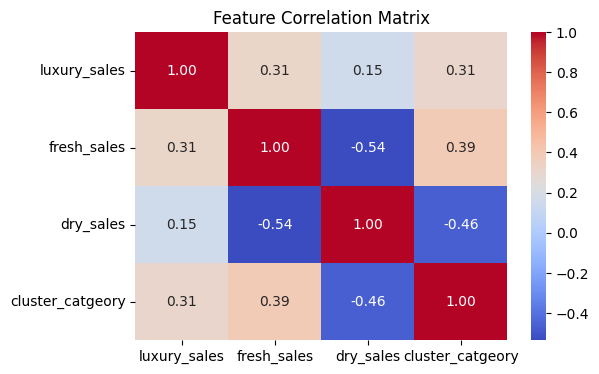

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert cluster_category to numeric for correlation analysis
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Compute correlation matrix
corr_matrix = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_catgeory']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
